# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [2]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
dotenv_path = Path('SAMPLE.env')
load_dotenv(dotenv_path=dotenv_path)

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19200468,
            "id": 1,
            "last_updated": 1667792341,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 401915394195,
                    "percent_change_1h": -0.369855151066743,
                    "percent_change_24h": -1.37388765167396,
                    "percent_change_7d": 1.52435468970112,
                    "percentage_change_1h": -0.369855151066743,
                    "percentage_change_24h": -1.37388765167396,
                    "percentage_change_7d": 1.52435468970112,
                    "price": 20938.0,
                    "volume_24h": 328653809393
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19200468,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

In [8]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json() 

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response , indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120523609,
            "id": 1027,
            "last_updated": 1667792341,
            "max_supply": 120523609,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 191328248564,
                    "percent_change_1h": -0.393970392506378,
                    "percent_change_24h": -2.12648808459123,
                    "percent_change_7d": -0.27770254501422,
                    "percentage_change_1h": -0.393970392506378,
                    "percentage_change_24h": -2.12648808459123,
                    "percentage_change_7d": -0.27770254501422,
                    "price": 1586.63,
                    "volume_24h": 23873790684
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120523609,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [9]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
# YOUR CODE HERE

print(f"The price for bitcoin is ${btc_price}")


The price for bitcoin is $20938.0


In [10]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
# YOUR CODE HERE

print(f"The price for bitcoin is ${eth_price}")

The price for bitcoin is $1586.63


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [11]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
# YOUR CODE HERE
btc_value


25125.6

In [12]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
# YOUR CODE HEREe
eth_value

8409.139000000001

In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value
# Print current cryptocurrency wallet balance
# YOUR CODE HERE
total_crypto_wallet

33534.739

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [14]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["spy", "agg"]

# Set timeframe to 1Day
# YOUR CODE HERE
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-11-03", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-11-03", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
prices_df =  alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE
prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])
# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
prices_df.head()


SPY                                   \
                              open   high     low   close    volume   
timestamp                                                             
2022-11-03 04:00:00+00:00  371.465  374.2  368.79  371.01  85657400   

                                                     AGG                 \
                          trade_count        vwap   open    high    low   
timestamp                                                                 
2022-11-03 04:00:00+00:00      641406  372.172239  93.97  94.505  93.93   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2022-11-03 04:00:00+00:00  94.35  9310830       31297  94.279681

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
# YOUR CODE HERE
agg_close_price

94.35

In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
# YOUR CODE HERE
spy_close_price

371.01

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
# YOUR CODE HERE
agg_value

18870.0

In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
# YOUR CODE HERE
spy_value 

40811.1

In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_shares + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
total_stocks_bonds

41011.1

In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
total_portfolio 

74545.839

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = [total_stocks_bonds, total_crypto_wallet]

# Review the Python list savings_data
# YOUR CODE HERE
savings_data

[41011.1, 33534.739]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:




# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE

savings_df = pd.DataFrame(data={'amount': savings_data}, index=["Stocks & Bonds", "Crypto"])

# Display the savings_df DataFrame
# YOUR CODE HERE

savings_df


,amount
Stocks & Bonds,41011.100
Crypto,33534.739


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

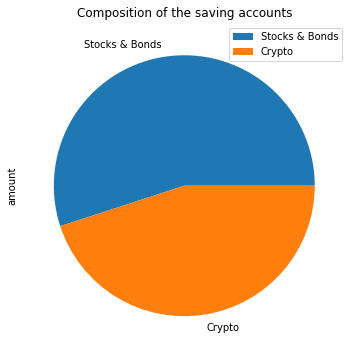

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot.pie(figsize=(6, 6), title="Composition of the saving accounts", y="amount");


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [27]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = 12000 * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
if total_portfolio > emergency_fund_value:
    print("Enough money in this fund")
    

# YOUR CODE HERE
elif  total_portfolio == emergency_fund_value:
    print("Congratulations on roaching this important fiancial goal")
    
# YOUR CODE HERE

elif  total_portfolio < emergency_fund_value:
    Money_require = emergency_fund_value - total_portfolio
    print(f"You need the following amount to reach your saving goal {(Money_require): .4f}% " )

Enough money in this fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [29]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
# YOUR CODE HERE

tickers = ["SPY", "AGG"]

In [30]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE

start_date = pd.Timestamp("2019-11-03", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-11-03", tz="America/New_York").isoformat()

prices_df =  alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df



# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE

SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE
prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE
display(prices_df.head())
display(prices_df.tail())


SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-11-04 05:00:00+00:00  307.86  308.0000  306.96  307.37  60606916   
2019-11-05 05:00:00+00:00  307.59  307.9195  306.71  307.04  42955771   
2019-11-06 05:00:00+00:00  307.03  307.4000  306.06  307.07  46487108   
2019-11-07 05:00:00+00:00  308.57  309.6500  307.66  308.21  54279174   
2019-11-08 05:00:00+00:00  307.80  309.0036  307.03  308.93  49068959   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2019-11-04 05:00:00+00:00      217934  307.058902  112.71  112.72  112.590   
2019-11-05 05:00:00+00:00      210376  307.186604  112.35  112.38  112.150   
2019-11-06 05:00:00+00:00      217559  306.885517  112.40  112.51  112.260   
2019-11-07 05:00:00+00:00      237931  308.471274  112.12  112.12  111.635   
2019-11-08 05:00:00+00:00      201770  308.340248  111.87  112.10  111.810   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-11-04 05:00:00+00:00  112.65  2723845       11743  112.644988  
2019-11-05 05:00:00+00:00  112.23  3766399       10707  112.237379  
2019-11-06 05:00:00+00:00  112.40  3908982       11879  112.416874  
2019-11-07 05:00:00+00:00  111.87  4022690       15189  111.883065  
2019-11-08 05:00:00+00:00  111.81  3866625       13190  111.881934

SPY                                     \
                              open    high     low   close     volume   
timestamp                                                               
2022-10-28 04:00:00+00:00  379.870  389.52  379.68  389.02  100160252   
2022-10-31 04:00:00+00:00  386.440  388.40  385.26  386.21   94154112   
2022-11-01 04:00:00+00:00  390.140  390.39  383.29  384.52   83777606   
2022-11-02 04:00:00+00:00  383.900  388.62  374.76  374.87  123496452   
2022-11-03 04:00:00+00:00  371.465  374.20  368.79  371.01   85657400   

                                                     AGG                   \
                          trade_count        vwap   open    high      low   
timestamp                                                                   
2022-10-28 04:00:00+00:00      597379  385.648651  95.01  95.460  94.9800   
2022-10-31 04:00:00+00:00      590831  386.876830  95.01  95.060  94.6000   
2022-11-01 04:00:00+00:00      541297  385.596075  95.25  95.350  94.6501   
2022-11-02 04:00:00+00:00      864897  381.528192  94.98  95.510  94.5300   
2022-11-03 04:00:00+00:00      641406  372.172239  93.97  94.505  93.9300   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2022-10-28 04:00:00+00:00  95.22   6224403       25972  95.234097  
2022-10-31 04:00:00+00:00  94.90  10885550       31486  94.892440  
2022-11-01 04:00:00+00:00  94.86   8075530       29991  94.855912  
2022-11-02 04:00:00+00:00  94.70   8348537       32460  94.986916  
2022-11-03 04:00:00+00:00  94.35   9310830       31297  94.279681

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_even_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
# YOUR CODE HERE

MC_even_weight.portfolio_data.head()

SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-11-04 05:00:00+00:00  307.86  308.0000  306.96  307.37  60606916   
2019-11-05 05:00:00+00:00  307.59  307.9195  306.71  307.04  42955771   
2019-11-06 05:00:00+00:00  307.03  307.4000  306.06  307.07  46487108   
2019-11-07 05:00:00+00:00  308.57  309.6500  307.66  308.21  54279174   
2019-11-08 05:00:00+00:00  307.80  309.0036  307.03  308.93  49068959   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-11-04 05:00:00+00:00      217934  307.058902          NaN  112.71   
2019-11-05 05:00:00+00:00      210376  307.186604    -0.001074  112.35   
2019-11-06 05:00:00+00:00      217559  306.885517     0.000098  112.40   
2019-11-07 05:00:00+00:00      237931  308.471274     0.003713  112.12   
2019-11-08 05:00:00+00:00      201770  308.340248     0.002336  111.87   

                                                                         \
                             high      low   close   volume trade_count   
timestamp                                                                 
2019-11-04 05:00:00+00:00  112.72  112.590  112.65  2723845       11743   
2019-11-05 05:00:00+00:00  112.38  112.150  112.23  3766399       10707   
2019-11-06 05:00:00+00:00  112.51  112.260  112.40  3908982       11879   
2019-11-07 05:00:00+00:00  112.12  111.635  111.87  4022690       15189   
2019-11-08 05:00:00+00:00  112.10  111.810  111.81  3866625       13190   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-11-04 05:00:00+00:00  112.644988          NaN  
2019-11-05 05:00:00+00:00  112.237379    -0.003728  
2019-11-06 05:00:00+00:00  112.416874     0.001515  
2019-11-07 05:00:00+00:00  111.883065    -0.004715  
2019-11-08 05:00:00+00:00  111.881934    -0.000536

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
MC_even_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998302,1.006780,1.004888,0.998637,0.992479,0.994833,0.996952,0.997456,0.994248,1.008218,...,1.020296,0.990787,1.008379,1.002974,1.007899,1.003546,0.996771,1.002207,1.006936,0.989575
2,1.004310,1.016380,1.004580,0.990478,0.991372,0.994170,0.981880,1.002219,0.988815,1.002536,...,1.025796,0.980572,1.001050,1.017251,1.015678,1.009843,0.997664,1.013711,1.013780,0.979070
3,0.999004,1.030158,1.005221,0.991307,0.989840,0.972620,0.986908,1.014841,0.995787,1.007452,...,1.030907,0.977892,1.007358,1.002875,1.026691,0.996774,1.000349,1.024603,1.010454,0.970108
4,0.985513,1.037513,0.996255,0.991067,0.991414,0.978592,0.992713,1.002921,0.993232,1.013849,...,1.036924,0.973020,1.030715,0.988721,1.034791,1.011971,1.009945,1.039198,1.021900,0.972560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.826532,1.338728,1.254389,1.651426,1.232874,1.439138,4.681021,1.557667,0.562724,3.537901,...,3.879732,2.736075,2.778822,2.223465,1.404001,1.349282,0.724687,3.746176,1.135803,1.188452
7557,1.836863,1.341188,1.251456,1.642151,1.244107,1.420645,4.676185,1.548893,0.568299,3.624788,...,3.912809,2.740548,2.737472,2.236285,1.403074,1.339079,0.721514,3.721524,1.134142,1.185182
7558,1.838891,1.344758,1.255513,1.621885,1.251768,1.427595,4.743580,1.532473,0.559564,3.662427,...,3.935045,2.740208,2.737496,2.217518,1.410434,1.361617,0.728329,3.648208,1.154784,1.186550
7559,1.845764,1.324118,1.250930,1.644006,1.248035,1.433699,4.790684,1.541131,0.568114,3.711226,...,3.893694,2.789306,2.733645,2.257451,1.416029,1.362437,0.726695,3.658834,1.147555,1.196302


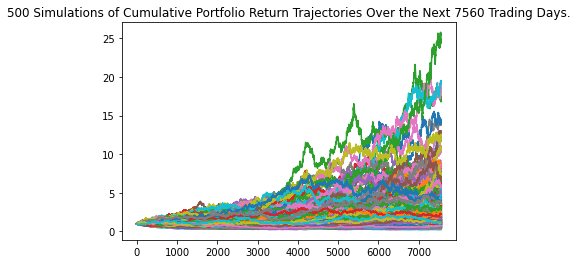

In [33]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
even_weight_line_plot = MC_even_weight.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

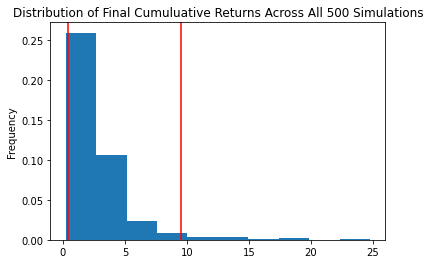

In [34]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
even_weight_distribution_plot = MC_even_weight.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [35]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
even_weight_table = MC_even_weight.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
print(even_weight_table)

count           500.000000
mean              2.709999
std               2.701903
min               0.224925
25%               1.113091
50%               1.908083
75%               3.422916
max              24.761745
95% CI Lower      0.443940
95% CI Upper      9.540018
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [36]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
display(total_portfolio)


74545.839

In [40]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = even_weight_table[8] * total_portfolio
ci_upper_thirty_cumulative_return = even_weight_table[9] * total_portfolio
 
# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that an initial investment of the total portfolio $74545.839"
      f" with an  60/40 weight portfolio over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")

There is a 95% chance that an initial investment of the total portfolio $74545.839 with an  60/40 weight portfolio over the next 30 years will end within in the range of $ 33093.86 and $ 711168.62.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [41]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_increased_stock_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)


# Review the simulation input data
# YOUR CODE HERE
MC_increased_stock_weight.portfolio_data.head()

SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-11-04 05:00:00+00:00  307.86  308.0000  306.96  307.37  60606916   
2019-11-05 05:00:00+00:00  307.59  307.9195  306.71  307.04  42955771   
2019-11-06 05:00:00+00:00  307.03  307.4000  306.06  307.07  46487108   
2019-11-07 05:00:00+00:00  308.57  309.6500  307.66  308.21  54279174   
2019-11-08 05:00:00+00:00  307.80  309.0036  307.03  308.93  49068959   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-11-04 05:00:00+00:00      217934  307.058902          NaN  112.71   
2019-11-05 05:00:00+00:00      210376  307.186604    -0.001074  112.35   
2019-11-06 05:00:00+00:00      217559  306.885517     0.000098  112.40   
2019-11-07 05:00:00+00:00      237931  308.471274     0.003713  112.12   
2019-11-08 05:00:00+00:00      201770  308.340248     0.002336  111.87   

                                                                         \
                             high      low   close   volume trade_count   
timestamp                                                                 
2019-11-04 05:00:00+00:00  112.72  112.590  112.65  2723845       11743   
2019-11-05 05:00:00+00:00  112.38  112.150  112.23  3766399       10707   
2019-11-06 05:00:00+00:00  112.51  112.260  112.40  3908982       11879   
2019-11-07 05:00:00+00:00  112.12  111.635  111.87  4022690       15189   
2019-11-08 05:00:00+00:00  112.10  111.810  111.81  3866625       13190   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-11-04 05:00:00+00:00  112.644988          NaN  
2019-11-05 05:00:00+00:00  112.237379    -0.003728  
2019-11-06 05:00:00+00:00  112.416874     0.001515  
2019-11-07 05:00:00+00:00  111.883065    -0.004715  
2019-11-08 05:00:00+00:00  111.881934    -0.000536

In [43]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_increased_stock_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995269,0.991547,1.032281,1.003036,1.010041,0.997881,0.994263,0.982796,1.011862,1.009112,...,0.991952,0.995087,0.992214,1.004249,0.996039,0.999582,1.012666,0.990956,1.014432,1.006851
2,0.991579,0.988207,1.024999,1.026258,1.014976,1.001138,0.994401,0.957102,1.007863,0.992276,...,0.991932,1.001190,0.991933,1.032003,0.980954,1.000702,1.024182,0.987264,1.021073,1.006391
3,0.987684,0.987181,1.024109,1.020666,1.018384,1.016310,0.990399,0.963108,1.004181,0.989562,...,1.003480,0.986184,0.978012,1.030786,0.981684,0.982408,1.021901,0.981045,0.986409,1.009768
4,0.989962,0.980784,1.014542,1.028659,1.041003,1.030701,0.997858,0.973048,0.998226,0.987675,...,1.004261,0.991899,0.988462,1.029182,0.956591,0.973070,1.015731,0.978886,1.003256,1.028547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.544469,12.731134,0.589483,0.822906,2.014986,3.044343,6.073323,1.686174,1.595220,1.095700,...,0.927404,1.052550,1.144616,0.958066,1.008394,2.821877,1.756345,0.938633,1.928445,6.702106
2517,0.554003,12.759792,0.583637,0.834701,2.034300,3.066643,6.154900,1.672365,1.628911,1.122726,...,0.927555,1.039954,1.167366,0.945589,1.004181,2.823428,1.745536,0.956628,1.921841,6.801755
2518,0.557113,13.013912,0.583813,0.829748,2.035917,3.043543,6.370927,1.669738,1.615103,1.078719,...,0.921436,1.051044,1.157371,0.932821,0.995096,2.844506,1.744815,0.955896,1.934638,6.781604
2519,0.556645,13.146817,0.583630,0.834445,2.022894,3.045162,6.377230,1.635516,1.627759,1.076393,...,0.923978,1.051496,1.189252,0.943796,0.977726,2.887014,1.713660,0.960838,1.973784,6.850713


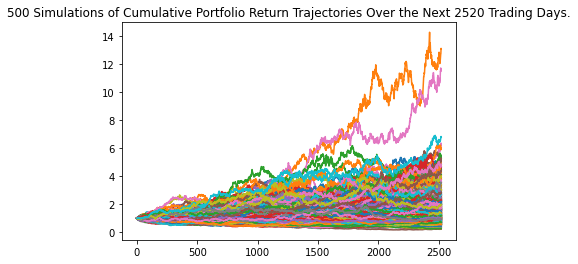

In [45]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
Increased_stock_weight_line_plot = MC_increased_stock_weight.plot_simulation()

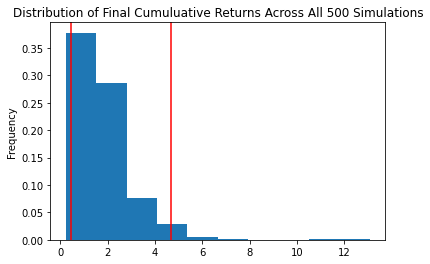

In [46]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
Increased_stock_weight_line_plot = MC_increased_stock_weight.plot_distribution()

In [48]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
Increased_stock_weight_table = MC_increased_stock_weight.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
print(Increased_stock_weight_table)

count           500.000000
mean              1.798029
std               1.255622
min               0.224598
25%               0.987881
50%               1.534238
75%               2.257877
max              13.092712
95% CI Lower      0.460971
95% CI Upper      4.681998
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [49]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
display(total_portfolio)

74545.839

In [50]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = Increased_stock_weight_table[8] * total_portfolio
ci_upper_ten_cumulative_return = Increased_stock_weight_table[9] * total_portfolio

# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that an initial investment of the total portfolio $74545.839"
      f" with an  80/20 weight portfolio over the next 30 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")


There is a 95% chance that an initial investment of the total portfolio $74545.839 with an  80/20 weight portfolio over the next 30 years will end within in the range of $ 34363.46 and $ 349023.50.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?